In [1]:
%load_ext autoreload
%autoreload 2
import utils
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool as ThreadPool
from tqdm import tqdm
from multiprocessing import Pool
import numpy.ma as ma
from scipy.ndimage import gaussian_filter

In [2]:
event_data = np.loadtxt("./data/events.txt")
position_data = np.loadtxt("./data/groundtruth.txt")

In [3]:
t_start = 1.9
duration = 0.1
# 
img_height = 180
img_width = 240

In [4]:
events_range = utils.get_events_range(event_data, t_start, duration)

In [5]:
type(events_range[0,0])

numpy.float64

In [6]:
depth_img = np.full((img_height, img_width, 3), -1.0)
depth_img.shape
for e in events_range:
    
    x = int(e[1])
    y = int(e[2])
    
    pos = float(utils.get_interpolated_position(e[0], position_data))*100
    pos = e[0]*10
    
    if depth_img[y, x, 1] != -1 and (pos - depth_img[y, x, 0] < 0.05*10):
        continue
    
    depth_img[y,x,0] = pos
    depth_img[y,x,1] += 1
    
    if x == 239:
        continue
    
    if depth_img[y,x+1,1] == 0:
        depth_img[y,x,2] = np.exp(depth_img[y,x,0] - depth_img[y,x+1,0])
        depth_img[y,x,1] = 2
    elif depth_img[y,x+1,1] > 0:
        depth_img[y,x,2] = (depth_img[y,x+1,2]*depth_img[y,x+1,1] + np.exp(depth_img[y,x,0] - depth_img[y,x+1,0])) / (depth_img[y,x+1,1] + 1)
        depth_img[y,x,1] = depth_img[y,x+1,1] + 1
        

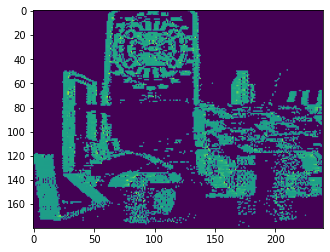

In [7]:
plt.imshow(depth_img[:,:,2])

In [8]:
mask = np.logical_or((depth_img[:,:,1]<=2), (depth_img[:,:,2] < 0.5))
depth_masked = ma.masked_where(mask, depth_img[:,:,2])

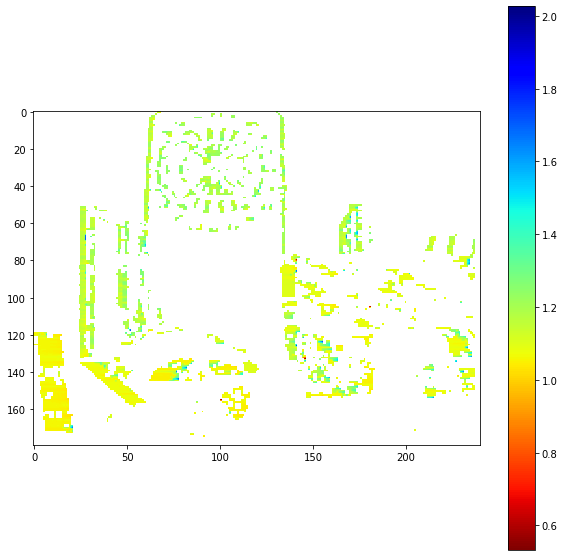

In [9]:
fig = plt.figure(figsize=(10, 10))
mappable = im = plt.imshow(depth_masked, cmap="jet_r")
fig.colorbar(mappable)

(array([3.0965e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.9000e+01, 1.3000e+01, 1.1000e+01,
        9.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.2000e+01, 2.0000e+00, 4.0000e+00,
        0.0000e+00, 2.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5200e+02,
        1.8740e+03, 2.5700e+03, 1.3360e+03, 1.3730e+03, 1.4720e+03,
        1.1540e+03, 5.1800e+02, 2.3100e+02, 2.1300e+02, 1.3000e+02,
        1.1000e+02, 1.1500e+02, 1.1500e+02, 7.7000e+01, 4.9000e+01,
        4.9000e+01, 4.5000e+01, 5.9000e+01, 4.90

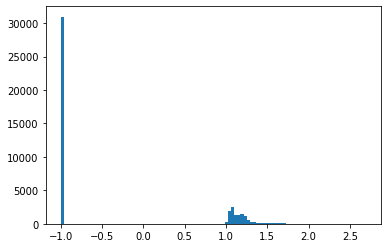

In [10]:
plt.hist(depth_img[:,:,2].flatten(), 100)

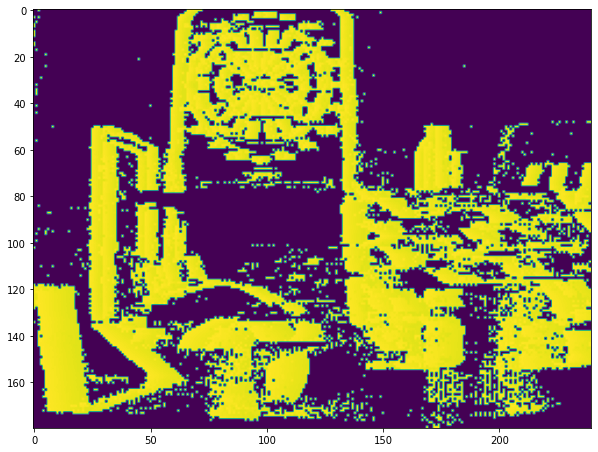

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(depth_img[:,:,0])

In [12]:
depth_img[:,:,2].max()

2.6870663169635307

In [13]:
depth_masked

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

-1.0

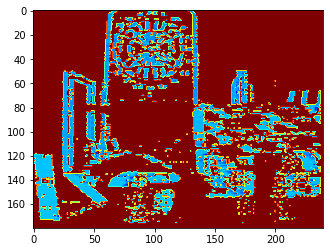

In [14]:
test = ma.filled(depth_masked, -1)
test = gaussian_filter(test, 0.2)

cmap = plt.cm.get_cmap("jet_r").copy()
cmap.set_bad(color='white')

plt.imshow(test, cmap=cmap)
test.min()

(array([2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 9.000e+01, 1.340e+02, 2.760e+02, 7.310e+02, 1.429e+03,
        1.123e+03, 8.560e+02, 6.440e+02, 4.920e+02, 4.940e+02, 5.630e+02,
        5.680e+02, 5.970e+02, 5.900e+02, 6.110e+02, 5.100e+02, 3.430e+02,
        2.530e+02, 1.840e+02, 1.210e+02, 9.500e+01, 9.000e+01, 9.200e+01,
        7.500e+01, 7.600e+01, 5.600e+01, 3.900e+01, 4.200e+01, 4.600e+01,
        5.000e+01, 3.800e+01, 6.600e+01, 4.900e+01, 3.400e+01, 3.500e+01,
        2.800e+01, 2.400e+01, 1.700e+01, 2.500e+01, 2.100e+01, 1.700e+01,
        1.900e+01, 2.800e+01, 1.000e+01, 1.900e+01, 2.200e+01, 3.300e+01,
        1.600e+01, 1.800e+01, 1.500e+0

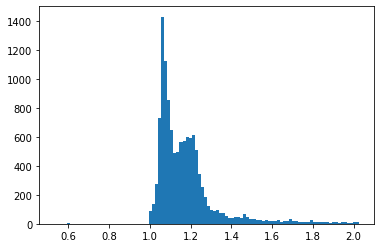

In [15]:
plt.hist(depth_masked.flatten(), 100)

In [16]:
test = ma.masked_where(depth_masked > 50, depth_masked)

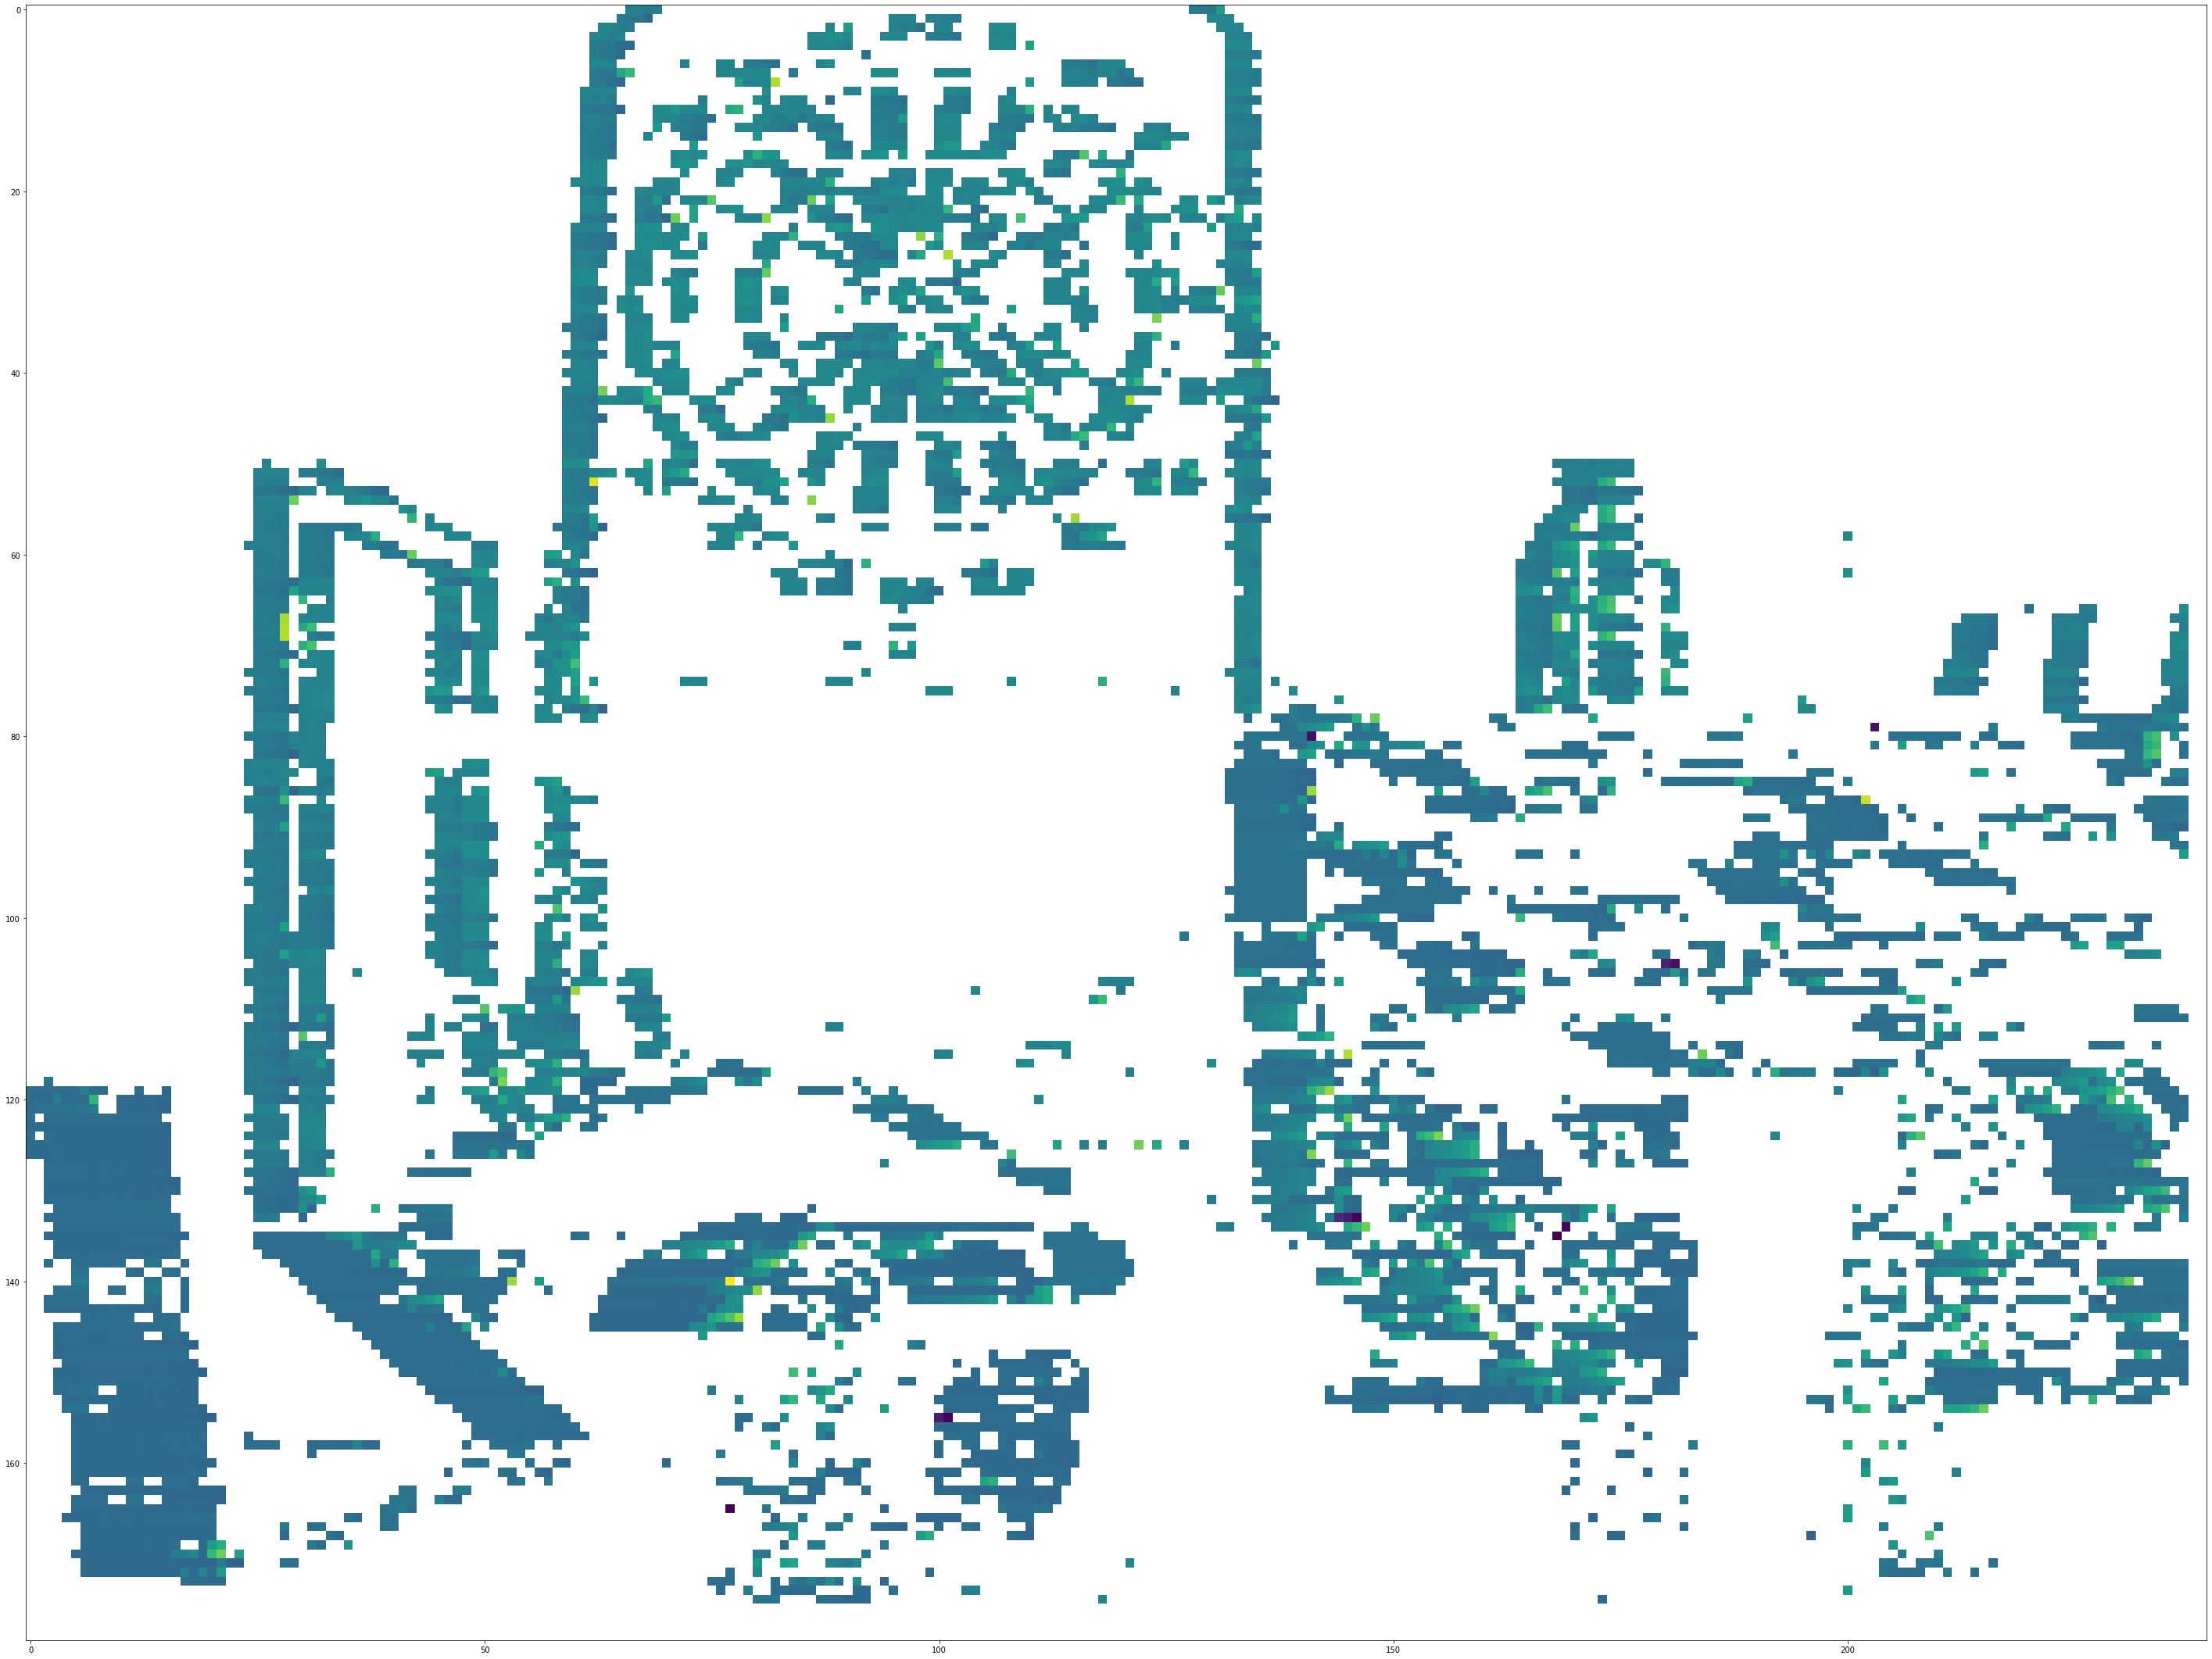

In [17]:
plt.figure(figsize=(50, 50))
plt.imshow(test)

In [22]:
(position_data[1, 1] - position_data[0, 1]) / (position_data[1, 0] - position_data[0, 0])

0.22163617816578374

In [23]:
(position_data[-1, 1] - position_data[0, 1]) / (position_data[-1, 0] - position_data[0, 0])

0.2901460156636141